# Amazon Prime TV Shows and Movies

# Business Problem:

- **What genres and categories dominate the platform?**
- **How does content distribution vary across different regions?**
- **How has Amazon Prime's content library evolved?**
- **What are the highest-rated or most popular shows on the platform?**

# Github Link:

https://github.com/Ganesh-Kamma/Amazon_Prime_EDA.git

# Datasets Summary:
- **id:** The title ID on JustWatch.
- **title:** The name of the title.
- **show_type:** TV show or movie.
- **description:** A brief description.
- **release_year:** The release year.
- **age_certification:** The age certification
- **runtime:** The length of the episode (SHOW) or movie.
- **genres:** A list of genres.
- **production_countries:** Alist of countries that produced the title.
- **seasons:** Number of seasons if it's a show.
- **imdb_id:** The title ID on IMDB.
- **imdb_score:** Score on IMDB.
- **imdb_votes:** Votes on IMDB.
- **tmdb_popularity:** Popularity on TMDB.
- **tmdb_score:** Score on TMDB.
- **person_ID:** The person ID on Just Watch.
- **id:** The title ID on Just Watch.
- **name:** The actor or director's name.
- **character_name:** The character name.
- **role:** Actor or Director.

**In today's competitive industry, platforms like Amazon Prime Video are constantly expanding their content with a growing number of shows and movies available on the platform, data-driven insights play a crucial role in understanding trends, audience preferences and content strategy.
This datasets were created to all shows available on Amazon Prime streaming and analyze the data named as credits and titles in csv files to find interesting facts in the United States such as Content Diversity, Regional Availability, Trends over time and IMDB ratings & popularity and content investment strategies in the streaming industry.**

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
import warnings
warnings.simplefilter("ignore")

In [2]:
df=pd.read_csv("credits.csv")
df.head()

,person_id,id,name,character,role
0,59401,ts20945,Joe Besser,Joe,ACTOR
1,31460,ts20945,Moe Howard,Moe,ACTOR
2,31461,ts20945,Larry Fine,Larry,ACTOR
3,21174,tm19248,Buster Keaton,Johnny Gray,ACTOR
4,28713,tm19248,Marion Mack,Annabelle Lee,ACTOR


In [3]:
df1=df.copy(deep=True)
df1.head()

,person_id,id,name,character,role
0,59401,ts20945,Joe Besser,Joe,ACTOR
1,31460,ts20945,Moe Howard,Moe,ACTOR
2,31461,ts20945,Larry Fine,Larry,ACTOR
3,21174,tm19248,Buster Keaton,Johnny Gray,ACTOR
4,28713,tm19248,Marion Mack,Annabelle Lee,ACTOR


In [4]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 124235 entries, 0 to 124234
Data columns (total 5 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   person_id  124235 non-null  int64 
 1   id         124235 non-null  object
 2   name       124235 non-null  object
 3   character  107948 non-null  object
 4   role       124235 non-null  object
dtypes: int64(1), object(4)
memory usage: 4.7+ MB


In [5]:
df1["role"].value_counts()

ACTOR       115846
DIRECTOR      8389
Name: role, dtype: int64

In [6]:
df1["character"].value_counts()

Himself              1540
Self                 1245
Herself               418
Henchman              242
Dancer                221
                     ... 
The Little Man          1
Pomade Vendor           1
Boy Hogwallop           1
Man with Bullhorn       1
Gissu                   1
Name: character, Length: 71097, dtype: int64

In [7]:
df1["id"].value_counts()

tm458582    137
tm33144     135
tm244162    135
tm32643     133
tm67583     128
           ... 
ts57359       1
tm539362      1
ts314386      1
tm214982      1
tm745779      1
Name: id, Length: 8861, dtype: int64

In [8]:
df1[df1["character"].isna()==True]

,person_id,id,name,character,role
25,28732,tm19248,Clyde Bruckman,NaN,DIRECTOR
26,21174,tm19248,Buster Keaton,NaN,DIRECTOR
56,1479923,tm82253,Marion Gray,NaN,ACTOR
57,13717,tm82253,William Wyler,NaN,DIRECTOR
93,23839,tm83884,Howard Hawks,NaN,DIRECTOR
...,...,...,...,...,...
124226,241498,tm847725,Super Subbarayan,NaN,ACTOR
124227,1288659,tm847725,Mathialagan Muniandy,NaN,ACTOR
124228,172842,tm847725,Sona Heiden,NaN,ACTOR
124229,1288705,tm847725,K. Veerakumar,NaN,DIRECTOR


In [9]:
df1.drop(["character"],axis=1,inplace=True)
df1.shape

(124235, 4)

In [10]:
df1

,person_id,id,name,role
0,59401,ts20945,Joe Besser,ACTOR
1,31460,ts20945,Moe Howard,ACTOR
2,31461,ts20945,Larry Fine,ACTOR
3,21174,tm19248,Buster Keaton,ACTOR
4,28713,tm19248,Marion Mack,ACTOR
...,...,...,...,...
124230,1938589,tm1054116,Sangam Shukla,ACTOR
124231,1938565,tm1054116,Vijay Thakur,ACTOR
124232,728899,tm1054116,Vanya Wellens,ACTOR
124233,1938620,tm1054116,Vishwa Bhanu,ACTOR


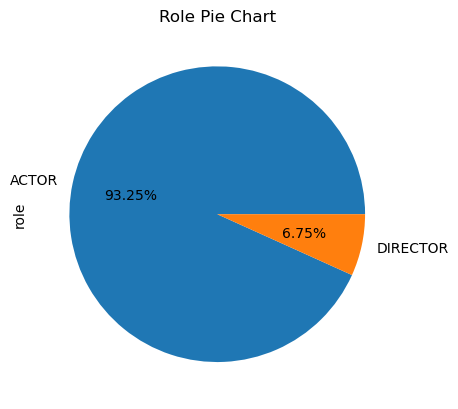

In [11]:
df1["role"].value_counts().plot(kind='pie',autopct="%0.2f%%")
plt.title("Role Pie Chart")
plt.show()

In [12]:
df2=pd.read_csv("titles.csv")
df2.head()

,id,title,type,description,release_year,age_certification,runtime,genres,production_countries,seasons,imdb_id,imdb_score,imdb_votes,tmdb_popularity,tmdb_score
0,ts20945,The Three Stooges,SHOW,The Three Stooges were an American vaudeville ...,1934,TV-PG,19,"['comedy', 'family', 'animation', 'action', 'f...",['US'],26.0,tt0850645,8.6,1092.0,15.424,7.6
1,tm19248,The General,MOVIE,"During America’s Civil War, Union spies steal ...",1926,NaN,78,"['action', 'drama', 'war', 'western', 'comedy'...",['US'],NaN,tt0017925,8.2,89766.0,8.647,8.0
2,tm82253,The Best Years of Our Lives,MOVIE,It's the hope that sustains the spirit of ever...,1946,NaN,171,"['romance', 'war', 'drama']",['US'],NaN,tt0036868,8.1,63026.0,8.435,7.8
3,tm83884,His Girl Friday,MOVIE,"Hildy, the journalist former wife of newspaper...",1940,NaN,92,"['comedy', 'drama', 'romance']",['US'],NaN,tt0032599,7.8,57835.0,11.270,7.4
4,tm56584,In a Lonely Place,MOVIE,An aspiring actress begins to suspect that her...,1950,NaN,94,"['thriller', 'drama', 'romance']",['US'],NaN,tt0042593,7.9,30924.0,8.273,7.6


In [13]:
df3=df2.copy(deep=True)
df3.head()

,id,title,type,description,release_year,age_certification,runtime,genres,production_countries,seasons,imdb_id,imdb_score,imdb_votes,tmdb_popularity,tmdb_score
0,ts20945,The Three Stooges,SHOW,The Three Stooges were an American vaudeville ...,1934,TV-PG,19,"['comedy', 'family', 'animation', 'action', 'f...",['US'],26.0,tt0850645,8.6,1092.0,15.424,7.6
1,tm19248,The General,MOVIE,"During America’s Civil War, Union spies steal ...",1926,NaN,78,"['action', 'drama', 'war', 'western', 'comedy'...",['US'],NaN,tt0017925,8.2,89766.0,8.647,8.0
2,tm82253,The Best Years of Our Lives,MOVIE,It's the hope that sustains the spirit of ever...,1946,NaN,171,"['romance', 'war', 'drama']",['US'],NaN,tt0036868,8.1,63026.0,8.435,7.8
3,tm83884,His Girl Friday,MOVIE,"Hildy, the journalist former wife of newspaper...",1940,NaN,92,"['comedy', 'drama', 'romance']",['US'],NaN,tt0032599,7.8,57835.0,11.270,7.4
4,tm56584,In a Lonely Place,MOVIE,An aspiring actress begins to suspect that her...,1950,NaN,94,"['thriller', 'drama', 'romance']",['US'],NaN,tt0042593,7.9,30924.0,8.273,7.6


In [14]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9871 entries, 0 to 9870
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    9871 non-null   object 
 1   title                 9871 non-null   object 
 2   type                  9871 non-null   object 
 3   description           9752 non-null   object 
 4   release_year          9871 non-null   int64  
 5   age_certification     3384 non-null   object 
 6   runtime               9871 non-null   int64  
 7   genres                9871 non-null   object 
 8   production_countries  9871 non-null   object 
 9   seasons               1357 non-null   float64
 10  imdb_id               9204 non-null   object 
 11  imdb_score            8850 non-null   float64
 12  imdb_votes            8840 non-null   float64
 13  tmdb_popularity       9324 non-null   float64
 14  tmdb_score            7789 non-null   float64
dtypes: float64(5), int64(

In [15]:
df3[df3["imdb_score"].isna()==True]

,id,title,type,description,release_year,age_certification,runtime,genres,production_countries,seasons,imdb_id,imdb_score,imdb_votes,tmdb_popularity,tmdb_score
42,tm119274,The Outlaw,MOVIE,Newly appointed sheriff Pat Garrett is pleased...,1943,NaN,116,['western'],['US'],NaN,NaN,NaN,NaN,7.503,5.6
79,tm348419,Payoff in the Pacific,MOVIE,A documentary on .S. efforts against the Japan...,1945,NaN,56,[],[],NaN,NaN,NaN,NaN,0.600,NaN
99,tm16906,San Pietro,MOVIE,This documentary movie is about the battle of ...,1945,NaN,32,"['war', 'documentation']",['US'],NaN,NaN,NaN,NaN,2.659,6.1
213,tm57795,The Stolen Jools,MOVIE,Famous actress Norma Shearer's jewels are stol...,1931,NaN,20,['comedy'],['US'],NaN,NaN,NaN,NaN,2.892,5.7
298,tm15681,Why We Fight: War Comes to America,MOVIE,The seventh and final film of Frank Capra's Wh...,1945,NaN,70,"['war', 'documentation']",['US'],NaN,NaN,NaN,NaN,1.840,6.8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9861,tm1142918,Ty Barnett: Yep,MOVIE,"Ty Barnett, a Chicago native, got his start at...",2021,PG,25,[],[],NaN,tt11979448,NaN,NaN,0.600,5.8
9865,ts295958,GameOn Titans,SHOW,Eight mobile gamers battle it out in a series ...,2021,NaN,17,[],[],1.0,tt14747014,NaN,NaN,NaN,NaN
9867,tm1079144,Jay Nog: Something from Nothing,MOVIE,Something From Nothing takes you on a stand-up...,2021,NaN,55,['comedy'],['US'],NaN,tt15041600,NaN,NaN,0.600,NaN
9868,tm847725,Chasing,MOVIE,A cop from Chennai sets out to nab a dreaded d...,2021,NaN,116,['crime'],['IN'],NaN,NaN,NaN,NaN,1.960,NaN


In [16]:
df3["age_certification"].value_counts()

R        1249
PG-13     588
PG        582
G         269
TV-MA     217
TV-14     188
TV-PG      91
TV-Y       78
TV-G       57
TV-Y7      52
NC-17      13
Name: age_certification, dtype: int64

In [17]:
df3.head(1)

,id,title,type,description,release_year,age_certification,runtime,genres,production_countries,seasons,imdb_id,imdb_score,imdb_votes,tmdb_popularity,tmdb_score
0,ts20945,The Three Stooges,SHOW,The Three Stooges were an American vaudeville ...,1934,TV-PG,19,"['comedy', 'family', 'animation', 'action', 'f...",['US'],26.0,tt0850645,8.6,1092.0,15.424,7.6


In [18]:
df3["production_countries"].value_counts()

['US']                4810
['IN']                1048
[]                     821
['GB']                 667
['CA']                 321
                      ... 
['TC']                   1
['FR', 'US', 'DE']       1
['PL', 'SK', 'CZ']       1
['PL', 'IL']             1
['US', 'PR']             1
Name: production_countries, Length: 497, dtype: int64

In [19]:
df3["release_year"].value_counts()

2021    856
2019    807
2020    698
2018    685
2017    581
       ... 
1919      4
1914      2
1916      2
1912      1
1917      1
Name: release_year, Length: 110, dtype: int64

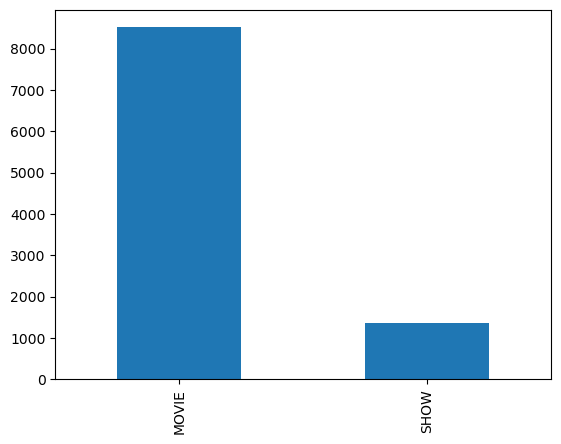

In [20]:
df3["type"].value_counts().plot(kind='bar')
plt.show()

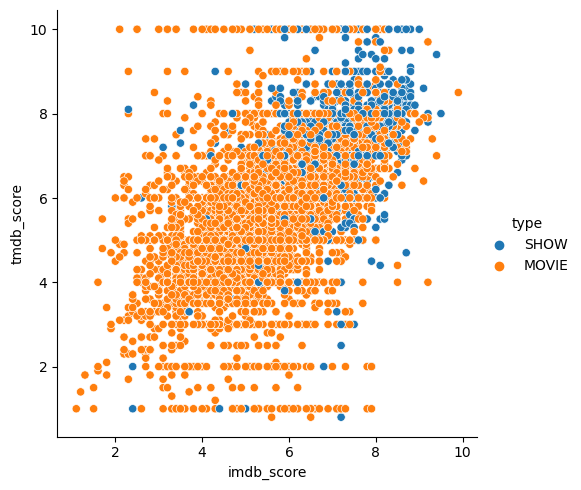

In [21]:
sns.relplot(x=df3["imdb_score"],y=df3["tmdb_score"],hue=df3["type"])
plt.show()

In [22]:
df1.head(1)

,person_id,id,name,role
0,59401,ts20945,Joe Besser,ACTOR


In [23]:
df3.head(1)

,id,title,type,description,release_year,age_certification,runtime,genres,production_countries,seasons,imdb_id,imdb_score,imdb_votes,tmdb_popularity,tmdb_score
0,ts20945,The Three Stooges,SHOW,The Three Stooges were an American vaudeville ...,1934,TV-PG,19,"['comedy', 'family', 'animation', 'action', 'f...",['US'],26.0,tt0850645,8.6,1092.0,15.424,7.6


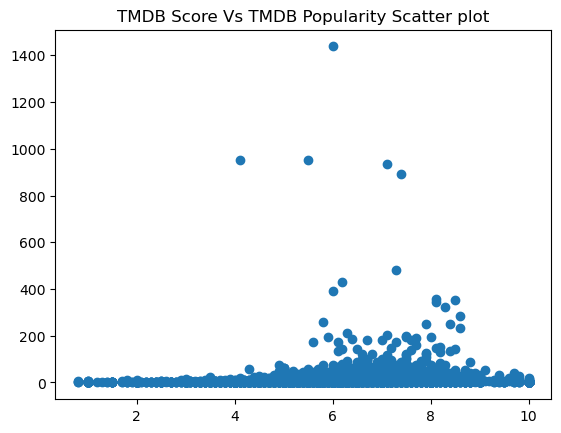

In [24]:
plt.scatter(df3["tmdb_score"],df3["tmdb_popularity"])
plt.title("TMDB Score Vs TMDB Popularity Scatter plot")
plt.show()

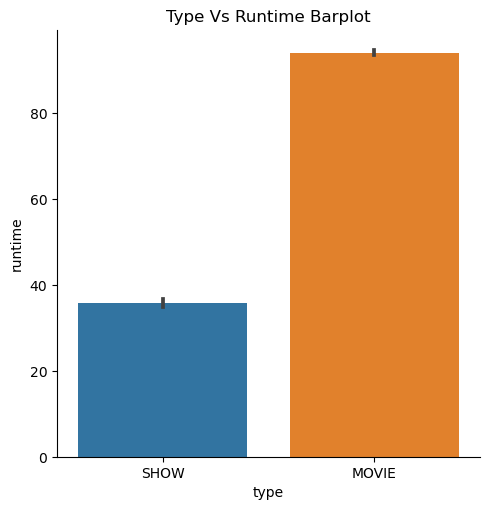

In [25]:
sns.catplot(x="type",y="runtime",data=df3,kind='bar')
plt.title("Type Vs Runtime Barplot")
plt.show()

In [26]:
df4=pd.merge(df1,df3,on='id',how='inner')
df4

,person_id,id,name,role,title,type,description,release_year,age_certification,runtime,genres,production_countries,seasons,imdb_id,imdb_score,imdb_votes,tmdb_popularity,tmdb_score
0,59401,ts20945,Joe Besser,ACTOR,The Three Stooges,SHOW,The Three Stooges were an American vaudeville ...,1934,TV-PG,19,"['comedy', 'family', 'animation', 'action', 'f...",['US'],26.0,tt0850645,8.6,1092.0,15.424,7.6
1,31460,ts20945,Moe Howard,ACTOR,The Three Stooges,SHOW,The Three Stooges were an American vaudeville ...,1934,TV-PG,19,"['comedy', 'family', 'animation', 'action', 'f...",['US'],26.0,tt0850645,8.6,1092.0,15.424,7.6
2,31461,ts20945,Larry Fine,ACTOR,The Three Stooges,SHOW,The Three Stooges were an American vaudeville ...,1934,TV-PG,19,"['comedy', 'family', 'animation', 'action', 'f...",['US'],26.0,tt0850645,8.6,1092.0,15.424,7.6
3,21174,tm19248,Buster Keaton,ACTOR,The General,MOVIE,"During America’s Civil War, Union spies steal ...",1926,NaN,78,"['action', 'drama', 'war', 'western', 'comedy'...",['US'],NaN,tt0017925,8.2,89766.0,8.647,8.0
4,28713,tm19248,Marion Mack,ACTOR,The General,MOVIE,"During America’s Civil War, Union spies steal ...",1926,NaN,78,"['action', 'drama', 'war', 'western', 'comedy'...",['US'],NaN,tt0017925,8.2,89766.0,8.647,8.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
124342,1938589,tm1054116,Sangam Shukla,ACTOR,Baikunth,MOVIE,"This story is about prevalent caste problem, e...",2021,NaN,72,"['family', 'drama']",[],NaN,tt14331982,8.4,49.0,0.645,NaN
124343,1938565,tm1054116,Vijay Thakur,ACTOR,Baikunth,MOVIE,"This story is about prevalent caste problem, e...",2021,NaN,72,"['family', 'drama']",[],NaN,tt14331982,8.4,49.0,0.645,NaN
124344,728899,tm1054116,Vanya Wellens,ACTOR,Baikunth,MOVIE,"This story is about prevalent caste problem, e...",2021,NaN,72,"['family', 'drama']",[],NaN,tt14331982,8.4,49.0,0.645,NaN
124345,1938620,tm1054116,Vishwa Bhanu,ACTOR,Baikunth,MOVIE,"This story is about prevalent caste problem, e...",2021,NaN,72,"['family', 'drama']",[],NaN,tt14331982,8.4,49.0,0.645,NaN


In [27]:
df4.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 124347 entries, 0 to 124346
Data columns (total 18 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   person_id             124347 non-null  int64  
 1   id                    124347 non-null  object 
 2   name                  124347 non-null  object 
 3   role                  124347 non-null  object 
 4   title                 124347 non-null  object 
 5   type                  124347 non-null  object 
 6   description           124256 non-null  object 
 7   release_year          124347 non-null  int64  
 8   age_certification     56707 non-null   object 
 9   runtime               124347 non-null  int64  
 10  genres                124347 non-null  object 
 11  production_countries  124347 non-null  object 
 12  seasons               8153 non-null    float64
 13  imdb_id               119044 non-null  object 
 14  imdb_score            118296 non-null  float64
 15  

In [28]:
df4.head(1)

,person_id,id,name,role,title,type,description,release_year,age_certification,runtime,genres,production_countries,seasons,imdb_id,imdb_score,imdb_votes,tmdb_popularity,tmdb_score
0,59401,ts20945,Joe Besser,ACTOR,The Three Stooges,SHOW,The Three Stooges were an American vaudeville ...,1934,TV-PG,19,"['comedy', 'family', 'animation', 'action', 'f...",['US'],26.0,tt0850645,8.6,1092.0,15.424,7.6


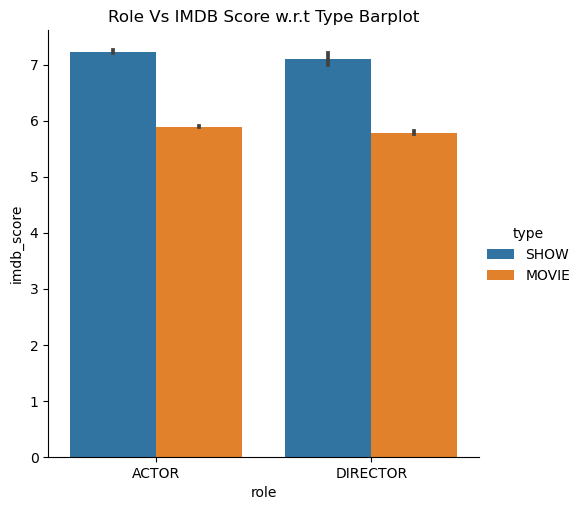

In [29]:
sns.catplot(x="role",y="imdb_score",hue="type",data=df4,kind='bar')
plt.title("Role Vs IMDB Score w.r.t Type Barplot")
plt.show()

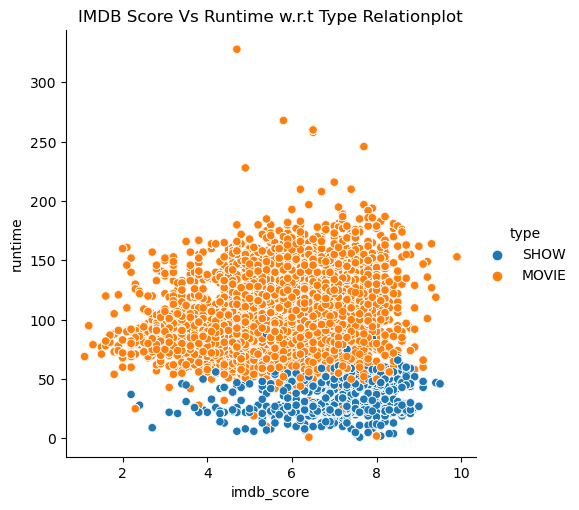

In [30]:
sns.relplot(x="imdb_score",y="runtime",hue="type",data=df4)
plt.title("IMDB Score Vs Runtime w.r.t Type Relationplot")
plt.show()

In [31]:
df4.groupby("type")[["imdb_score","tmdb_score","tmdb_popularity","seasons",
                     "imdb_votes","runtime"]].mean().round(2)

,imdb_score,tmdb_score,tmdb_popularity,seasons,imdb_votes,runtime
type,,,,,,
MOVIE,5.89,5.90,9.65,NaN,23927.51,99.36
SHOW,7.22,7.28,17.53,2.34,12754.58,41.03


In [32]:
df4.groupby("role")[["imdb_score","tmdb_score","tmdb_popularity","seasons",
                     "imdb_votes","runtime"]].mean().round(2)

,imdb_score,tmdb_score,tmdb_popularity,seasons,imdb_votes,runtime
role,,,,,,
ACTOR,5.98,6.00,10.44,2.37,24261.64,95.79
DIRECTOR,5.83,5.85,6.35,1.68,8703.27,91.99


In [33]:
pd.crosstab(df4["type"],df4["role"],margins=True)

role,ACTOR,DIRECTOR,All
type,,,
MOVIE,108167,8027,116194
SHOW,7785,368,8153
All,115952,8395,124347


In [34]:
df4["name"].value_counts()

George 'Gabby' Hayes    49
Roy Rogers              45
Bess Flowers            44
Joseph Kane             41
Gene Autry              40
                        ..
Buakaw Banchamek         1
Thammaros Jaichuen       1
Thanawut Kasro           1
Mukuda Hann              1
Ricky Lomax              1
Name: name, Length: 79758, dtype: int64

In [35]:
df4.head(1)

,person_id,id,name,role,title,type,description,release_year,age_certification,runtime,genres,production_countries,seasons,imdb_id,imdb_score,imdb_votes,tmdb_popularity,tmdb_score
0,59401,ts20945,Joe Besser,ACTOR,The Three Stooges,SHOW,The Three Stooges were an American vaudeville ...,1934,TV-PG,19,"['comedy', 'family', 'animation', 'action', 'f...",['US'],26.0,tt0850645,8.6,1092.0,15.424,7.6


In [36]:
pd.crosstab(df4["release_year"],df4["role"],margins=True)

role,ACTOR,DIRECTOR,All
release_year,,,
1912,10,1,11
1914,31,2,33
1915,48,5,53
1916,124,2,126
1917,7,1,8
...,...,...,...
2019,7792,665,8457
2020,6393,531,6924
2021,6884,626,7510


In [37]:
pd.crosstab(df4["release_year"],df4["type"],margins=True)

type,MOVIE,SHOW,All
release_year,,,
1912,11,0,11
1914,33,0,33
1915,53,0,53
1916,126,0,126
1917,8,0,8
...,...,...,...
2019,7883,574,8457
2020,6155,769,6924
2021,6523,987,7510


In [38]:
df4.head(1)

,person_id,id,name,role,title,type,description,release_year,age_certification,runtime,genres,production_countries,seasons,imdb_id,imdb_score,imdb_votes,tmdb_popularity,tmdb_score
0,59401,ts20945,Joe Besser,ACTOR,The Three Stooges,SHOW,The Three Stooges were an American vaudeville ...,1934,TV-PG,19,"['comedy', 'family', 'animation', 'action', 'f...",['US'],26.0,tt0850645,8.6,1092.0,15.424,7.6


In [39]:
df4.shape

(124347, 18)

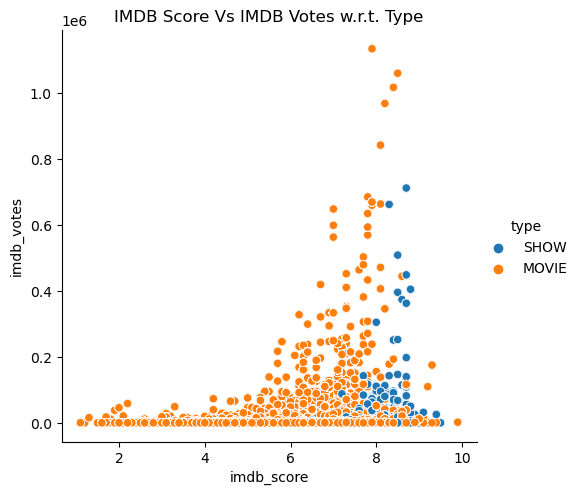

In [40]:
sns.relplot(x="imdb_score",y="imdb_votes",data=df4,hue='type')
plt.title("IMDB Score Vs IMDB Votes w.r.t. Type")
plt.show()

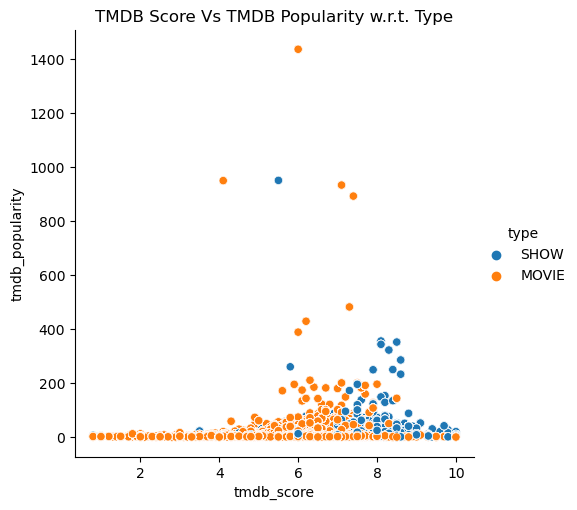

In [41]:
sns.relplot(x="tmdb_score",y="tmdb_popularity",data=df4,hue='type')
plt.title("TMDB Score Vs TMDB Popularity w.r.t. Type")
plt.show()

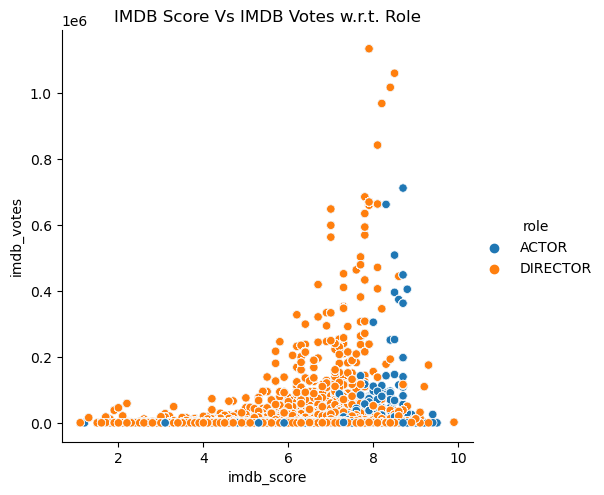

In [42]:
sns.relplot(x="imdb_score",y="imdb_votes",data=df4,hue='role')
plt.title("IMDB Score Vs IMDB Votes w.r.t. Role")
plt.show()

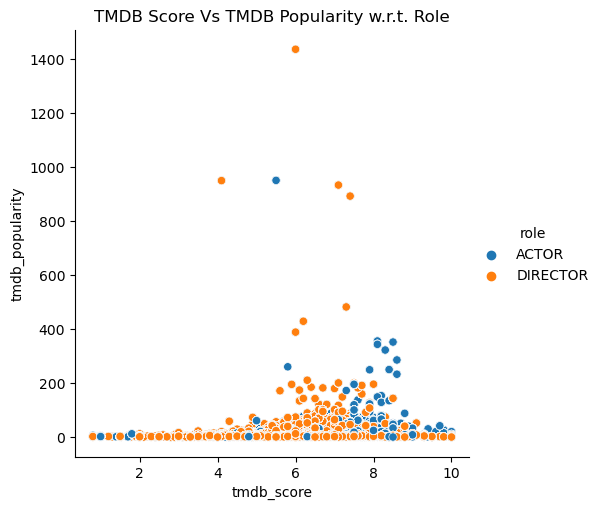

In [43]:
sns.relplot(x="tmdb_score",y="tmdb_popularity",data=df4,hue='role')
plt.title("TMDB Score Vs TMDB Popularity w.r.t. Role")
plt.show()

In [44]:
df4["release_year"].value_counts()

2019    8457
2021    7510
2020    6924
2018    6917
2017    6296
        ... 
1922      44
1914      33
1928      28
1912      11
1917       8
Name: release_year, Length: 110, dtype: int64

In [45]:
df4.shape

(124347, 18)

In [46]:
df4.head(1)

,person_id,id,name,role,title,type,description,release_year,age_certification,runtime,genres,production_countries,seasons,imdb_id,imdb_score,imdb_votes,tmdb_popularity,tmdb_score
0,59401,ts20945,Joe Besser,ACTOR,The Three Stooges,SHOW,The Three Stooges were an American vaudeville ...,1934,TV-PG,19,"['comedy', 'family', 'animation', 'action', 'f...",['US'],26.0,tt0850645,8.6,1092.0,15.424,7.6


In [47]:
df4.shape

(124347, 18)

In [48]:
df4.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 124347 entries, 0 to 124346
Data columns (total 18 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   person_id             124347 non-null  int64  
 1   id                    124347 non-null  object 
 2   name                  124347 non-null  object 
 3   role                  124347 non-null  object 
 4   title                 124347 non-null  object 
 5   type                  124347 non-null  object 
 6   description           124256 non-null  object 
 7   release_year          124347 non-null  int64  
 8   age_certification     56707 non-null   object 
 9   runtime               124347 non-null  int64  
 10  genres                124347 non-null  object 
 11  production_countries  124347 non-null  object 
 12  seasons               8153 non-null    float64
 13  imdb_id               119044 non-null  object 
 14  imdb_score            118296 non-null  float64
 15  

In [49]:
df4.duplicated().sum()

344

In [50]:
df4.drop_duplicates(inplace=True)

In [51]:
df4.shape

(124003, 18)

In [52]:
df4.head(2)

,person_id,id,name,role,title,type,description,release_year,age_certification,runtime,genres,production_countries,seasons,imdb_id,imdb_score,imdb_votes,tmdb_popularity,tmdb_score
0,59401,ts20945,Joe Besser,ACTOR,The Three Stooges,SHOW,The Three Stooges were an American vaudeville ...,1934,TV-PG,19,"['comedy', 'family', 'animation', 'action', 'f...",['US'],26.0,tt0850645,8.6,1092.0,15.424,7.6
1,31460,ts20945,Moe Howard,ACTOR,The Three Stooges,SHOW,The Three Stooges were an American vaudeville ...,1934,TV-PG,19,"['comedy', 'family', 'animation', 'action', 'f...",['US'],26.0,tt0850645,8.6,1092.0,15.424,7.6


In [53]:
df4["name"].value_counts()

George 'Gabby' Hayes      49
Roy Rogers                45
Bess Flowers              44
Joseph Kane               41
Gene Autry                40
                          ..
Janet Khiew                1
Jacqueline Apitananon      1
Sushin Kuan-saghaun        1
Surachai Sombatchareon     1
Ricky Lomax                1
Name: name, Length: 79758, dtype: int64

In [54]:
df4["type"].value_counts()

MOVIE    115874
SHOW       8129
Name: type, dtype: int64

In [55]:
df4.drop(["description","person_id","imdb_id"],axis=1,inplace=True)
df4.shape

(124003, 15)

In [56]:
df4.duplicated().sum()

23

In [57]:
df4.head()

,id,name,role,title,type,release_year,age_certification,runtime,genres,production_countries,seasons,imdb_score,imdb_votes,tmdb_popularity,tmdb_score
0,ts20945,Joe Besser,ACTOR,The Three Stooges,SHOW,1934,TV-PG,19,"['comedy', 'family', 'animation', 'action', 'f...",['US'],26.0,8.6,1092.0,15.424,7.6
1,ts20945,Moe Howard,ACTOR,The Three Stooges,SHOW,1934,TV-PG,19,"['comedy', 'family', 'animation', 'action', 'f...",['US'],26.0,8.6,1092.0,15.424,7.6
2,ts20945,Larry Fine,ACTOR,The Three Stooges,SHOW,1934,TV-PG,19,"['comedy', 'family', 'animation', 'action', 'f...",['US'],26.0,8.6,1092.0,15.424,7.6
3,tm19248,Buster Keaton,ACTOR,The General,MOVIE,1926,NaN,78,"['action', 'drama', 'war', 'western', 'comedy'...",['US'],NaN,8.2,89766.0,8.647,8.0
4,tm19248,Marion Mack,ACTOR,The General,MOVIE,1926,NaN,78,"['action', 'drama', 'war', 'western', 'comedy'...",['US'],NaN,8.2,89766.0,8.647,8.0


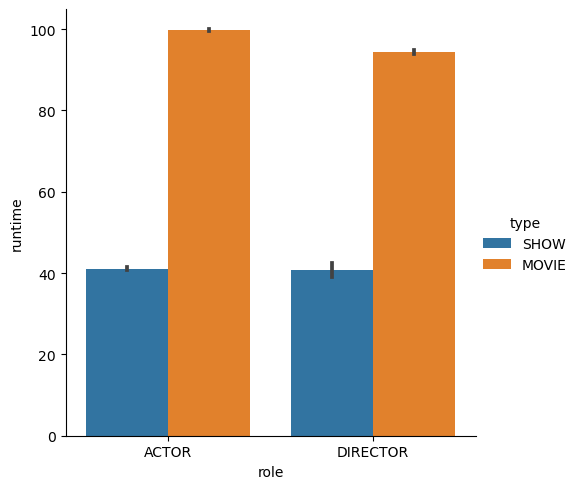

In [58]:
sns.catplot(x="role",y="runtime",hue="type",kind='bar',data=df4)
plt.show()

In [59]:
df4.columns

Index(['id', 'name', 'role', 'title', 'type', 'release_year',
       'age_certification', 'runtime', 'genres', 'production_countries',
       'seasons', 'imdb_score', 'imdb_votes', 'tmdb_popularity', 'tmdb_score'],
      dtype='object')

In [60]:
class movies:
    def __init__(self,df4:pd.DataFrame):
        self.df4=df4
    def highest_tmdb_score(self,top_n:int=15):
        tmdb_score_high=self.df4.nlargest(top_n,"tmdb_score")
        return tmdb_score_high[["name","role","release_year","title","genres","tmdb_score"]]
mv=movies(df4)
print("Top 15 TMDB Score Movies,Genres,Titles & Names and Roles:\n")
high_score=mv.highest_tmdb_score(15)
print(high_score)

Top 15 TMDB Score Movies,Genres,Titles & Names and Roles:

                       name   role  release_year              title  \
12803            Roy Rogers  ACTOR          1942  Man from Cheyenne   
12804  George 'Gabby' Hayes  ACTOR          1942  Man from Cheyenne   
12805           Sally Payne  ACTOR          1942  Man from Cheyenne   
12806          Lynne Carver  ACTOR          1942  Man from Cheyenne   
12807         William Haade  ACTOR          1942  Man from Cheyenne   
12808            James Seay  ACTOR          1942  Man from Cheyenne   
12809            Gale Storm  ACTOR          1942  Man from Cheyenne   
12810           Jack Ingram  ACTOR          1942  Man from Cheyenne   
12811             Pat Brady  ACTOR          1942  Man from Cheyenne   
12812          Lynton Brent  ACTOR          1942  Man from Cheyenne   
12813        Frank Brownlee  ACTOR          1942  Man from Cheyenne   
12814             Bob Burns  ACTOR          1942  Man from Cheyenne   
12815            F

In [61]:
df4["type"].value_counts()

MOVIE    115874
SHOW       8129
Name: type, dtype: int64

In [62]:
df4.drop("name",axis=1,inplace=True)

In [63]:
df4.head(1)

,id,role,title,type,release_year,age_certification,runtime,genres,production_countries,seasons,imdb_score,imdb_votes,tmdb_popularity,tmdb_score
0,ts20945,ACTOR,The Three Stooges,SHOW,1934,TV-PG,19,"['comedy', 'family', 'animation', 'action', 'f...",['US'],26.0,8.6,1092.0,15.424,7.6


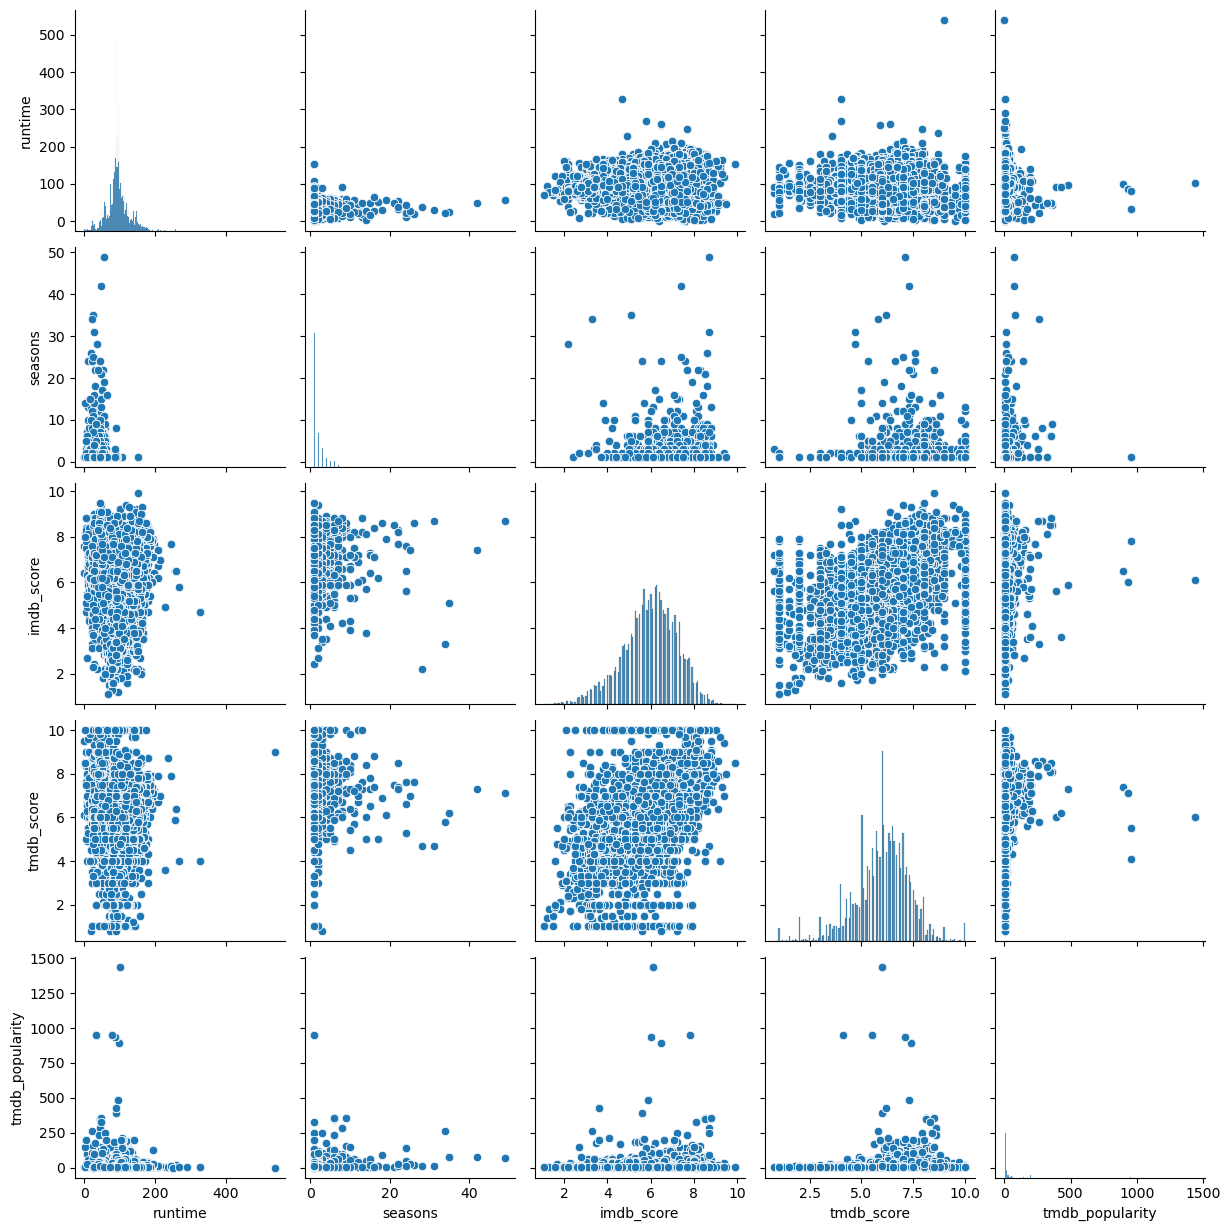

In [64]:
sns.pairplot(df4[["runtime","seasons","imdb_score","tmdb_score","tmdb_popularity"]])
plt.show()

**What genres and Categories dominate the platform?**

In [65]:
df4.apply(lambda x: x.duplicated().sum())

id                      115142
role                    124001
title                   115255
type                    124001
release_year            123893
age_certification       123991
runtime                 123799
genres                  122038
production_countries    123521
seasons                 123972
imdb_score              123917
imdb_votes              120379
tmdb_popularity         118735
tmdb_score              123914
dtype: int64

In [66]:
df4["genres"].value_counts()

['drama']                                                9849
['comedy']                                               5574
['drama', 'romance']                                     2511
['horror']                                               2448
['documentation']                                        2373
                                                         ... 
['comedy', 'crime', 'animation']                            1
['comedy', 'animation', 'fantasy', 'family', 'music']       1
['documentation', 'crime', 'drama', 'history']              1
['scifi', 'documentation']                                  1
['documentation', 'crime', 'european']                      1
Name: genres, Length: 1965, dtype: int64

**How does content distribution vary across different regions?**

In [67]:
df4.head(1)

,id,role,title,type,release_year,age_certification,runtime,genres,production_countries,seasons,imdb_score,imdb_votes,tmdb_popularity,tmdb_score
0,ts20945,ACTOR,The Three Stooges,SHOW,1934,TV-PG,19,"['comedy', 'family', 'animation', 'action', 'f...",['US'],26.0,8.6,1092.0,15.424,7.6


In [68]:
df4["production_countries"].value_counts()

['US']                      69136
['IN']                      11162
['GB']                       7189
['CA']                       3197
[]                           2295
                            ...  
['GB', 'NO', 'PL']              1
['AF']                          1
['DE', 'JP']                    1
['PF', 'US', 'CA', 'FJ']        1
['IL', 'ES']                    1
Name: production_countries, Length: 482, dtype: int64

In [69]:
pd.crosstab(df4["production_countries"],df4["type"],margins=True)

type,MOVIE,SHOW,All
production_countries,,,
"['AF', 'US']",17,0,17
['AF'],1,0,1
"['AL', 'CY', 'GR']",9,0,9
"['AN', 'US']",9,0,9
"['AR', 'US', 'AQ']",3,0,3
...,...,...,...
"['ZA', 'US', 'NZ', 'CA']",92,0,92
"['ZA', 'US']",16,0,16
['ZA'],167,0,167


In [70]:
pd.crosstab(df4["production_countries"],df4["genres"],margins=True)

genres,"['action', 'animation', 'comedy', 'crime']","['action', 'animation', 'comedy', 'family', 'scifi', 'european']","['action', 'animation', 'comedy', 'family']","['action', 'animation', 'comedy', 'romance']","['action', 'animation', 'drama', 'history']","['action', 'animation', 'family', 'comedy', 'crime', 'european']","['action', 'animation', 'family', 'comedy', 'fantasy', 'romance']","['action', 'animation', 'family', 'fantasy', 'scifi']","['action', 'animation', 'fantasy']","['action', 'animation', 'scifi', 'western', 'fantasy', 'comedy', 'family']",...,"['western', 'romance']","['western', 'scifi', 'crime', 'romance']","['western', 'sport', 'action', 'music', 'romance']","['western', 'thriller']","['western', 'war', 'drama', 'history', 'romance']","['western', 'war', 'romance']","['western', 'war']",['western'],[],All
production_countries,,,,,,,,,,,,,,,,,,,,,
"['AF', 'US']",0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,17
['AF'],0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
"['AL', 'CY', 'GR']",0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,9
"['AN', 'US']",0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,9
"['AR', 'US', 'AQ']",0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
"['ZA', 'US', 'NZ', 'CA']",0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,92
"['ZA', 'US']",0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,16
['ZA'],0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,167


**How has Amazon Prime's content library evolved?**

In [71]:
df4[["runtime","seasons","imdb_score","imdb_votes","tmdb_popularity","tmdb_score"]].describe().round(1)

,runtime,seasons,imdb_score,imdb_votes,tmdb_popularity,tmdb_score
count,124003.0,8129.0,117955.0,117931.0,123988.0,113847.0
mean,95.6,2.3,6.0,23297.7,10.2,6.0
std,30.2,3.1,1.2,88514.6,40.8,1.3
min,1.0,1.0,1.1,5.0,0.0,0.8
25%,83.0,1.0,5.2,289.0,1.9,5.3
50%,93.0,1.0,6.1,1257.0,3.9,6.1
75%,109.0,2.0,6.8,7082.0,8.8,6.8
max,540.0,49.0,9.9,1133692.0,1437.9,10.0


In [72]:
df4["release_year"].value_counts()

2019    8450
2021    7502
2020    6918
2018    6912
2017    6288
        ... 
1922      44
1914      33
1928      28
1912      11
1917       8
Name: release_year, Length: 110, dtype: int64

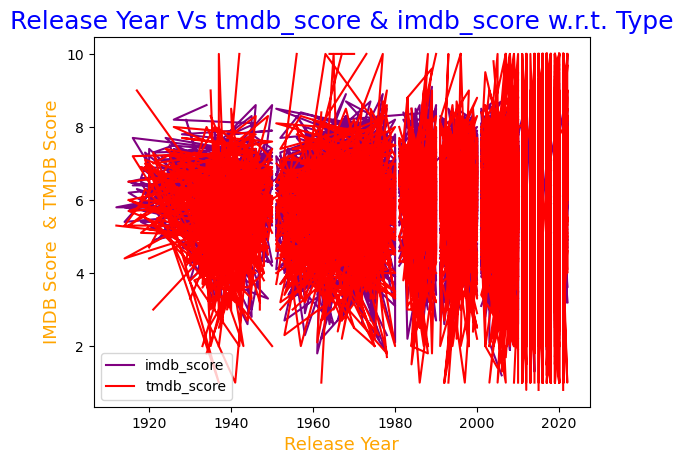

In [73]:
plt.plot("release_year","imdb_score",data=df4,label="imdb_score",color='purple')
plt.plot("release_year","tmdb_score",data=df4,label="tmdb_score",color='red')
plt.title("Release Year Vs tmdb_score & imdb_score w.r.t. Type",color='b',fontsize=18)
plt.xlabel("Release Year",color='orange',fontsize=13)
plt.ylabel("IMDB Score  & TMDB Score",color='orange',fontsize=13)
plt.legend()
plt.show()

**What are the highest-rated or most popular shows on the platform?**

In [74]:
df4.head(1)

,id,role,title,type,release_year,age_certification,runtime,genres,production_countries,seasons,imdb_score,imdb_votes,tmdb_popularity,tmdb_score
0,ts20945,ACTOR,The Three Stooges,SHOW,1934,TV-PG,19,"['comedy', 'family', 'animation', 'action', 'f...",['US'],26.0,8.6,1092.0,15.424,7.6


In [75]:
df4.drop_duplicates(ignore_index=True,inplace=True)

In [76]:
df4.shape

(16352, 14)

In [77]:
df4.drop(["id","age_certification"],axis=1,inplace=True)

In [78]:
df4.head(1)

,role,title,type,release_year,runtime,genres,production_countries,seasons,imdb_score,imdb_votes,tmdb_popularity,tmdb_score
0,ACTOR,The Three Stooges,SHOW,1934,19,"['comedy', 'family', 'animation', 'action', 'f...",['US'],26.0,8.6,1092.0,15.424,7.6


In [79]:
class rated_movies:
    def __init__(self,df4:pd.DataFrame):
        self.df4=df4
    def highest_imdb_score(self,top_n=10):
        imdb_score_high=self.df4.nlargest(top_n,"imdb_score")
        imdb_score_high.drop_duplicates(ignore_index=True,inplace=True)
        return imdb_score_high[["title","type","role","release_year","genres","imdb_score","tmdb_score"]]
    def lowest_imdb_score(self,least_n=10):
        imdb_score_low=self.df4.nsmallest(least_n,"imdb_score")
        imdb_score_low.drop_duplicates(ignore_index=True,inplace=True)
        return imdb_score_low[["title","type","role","release_year","genres","imdb_score","tmdb_score"]]

mvr=rated_movies(df4)
print("<=======Top 10 Highest IMDB Score Movies Titles & Names and Roles:=========>\n")
high_score=mvr.highest_imdb_score(10)
print(high_score)
print("\n")
print("<=====Top 10 Least IMDB Score Movies,Genres, Roles, Titles and Names:========>\n")
low_score=mvr.lowest_imdb_score(10)
print(low_score)

<=======Top 10 Highest IMDB Score Movies Titles & Names and Roles:=========>

               title   type      role  release_year  \
0         Pawankhind  MOVIE     ACTOR          2022   
1         Pawankhind  MOVIE  DIRECTOR          2022   
2  Couple of Mirrors   SHOW     ACTOR          2021   
3         The Chosen   SHOW     ACTOR          2019   
4         Tari Sathe  MOVIE     ACTOR          2021   
5           Jai Bhim  MOVIE     ACTOR          2021   
6           Jai Bhim  MOVIE  DIRECTOR          2021   
7  Pazhagiya Naatkal  MOVIE  DIRECTOR          2021   
8    Soorarai Pottru  MOVIE     ACTOR          2020   
9    Soorarai Pottru  MOVIE  DIRECTOR          2020   

                           genres  imdb_score  tmdb_score  
0  ['action', 'drama', 'history']         9.9         8.5  
1  ['action', 'drama', 'history']         9.9         8.5  
2   ['drama', 'romance', 'crime']         9.5         8.0  
3            ['drama', 'history']         9.4         9.4  
4             ['